In [6]:
using MIToS
using MIToS.MSA
using MIToS.Information
using StatsBase
using Plots
using LinearAlgebra
using Distances
using Clustering
using PairwiseListMatrices
using Statistics
using GraphRecipes
using DataFrames
using StatsPlots 

In [7]:
# Truncate IJulia outputs at:
ENV["LINES"]   = 20 
ENV["COLUMNS"] = 600;

In [8]:
fasta_file = "seqgen_val2k.fasta"
msa = read(fasta_file, FASTA, generatemapping=true, useidcoordinates=true)
println("This MSA has ", nsequences(msa), " sequences...")
#fig = plotmsa(msa; colorscheme = :tableau_blue_green)

This MSA has 4 sequences...


In [9]:
#msa = msa[:,556:1000]

In [10]:
coverage(msa)

4×1 Named Matrix{Float64}
Seq ╲ Function │ coverage
───────────────┼─────────
Taxon1         │      1.0
Taxon2         │      1.0
Taxon3         │      1.0
Taxon4         │      1.0

In [11]:
columngapfraction(msa)

1×40 Named Matrix{Float64}
Function ╲ Col │   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40
───────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
gapfraction    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

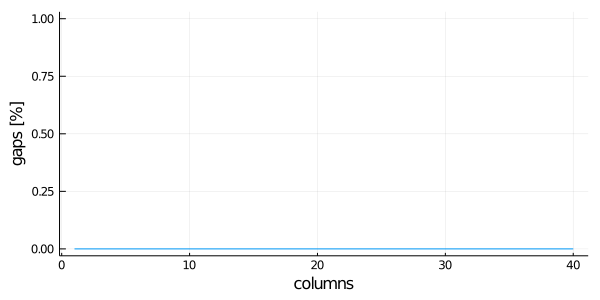

In [12]:
gr(size=(600,300))

plot(   1:ncolumns(msa), # x is a range from 1 to the number of columns
        vec(columngapfraction(msa)) .* 100.0, # y is a Vector{Float64} with the percentage of gaps of each column
        linetype = :line,
        ylabel = "gaps [%]",
        xlabel = "columns",
        legend=false)

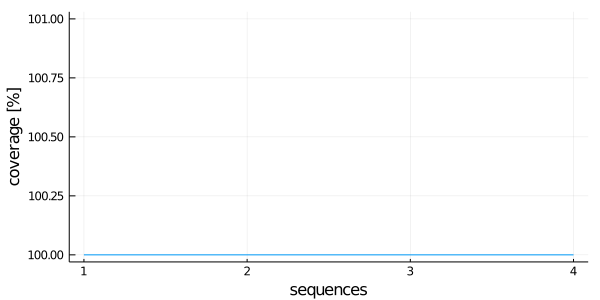

In [13]:
plot(   1:nsequences(msa), # x is a range from 1 to the number of sequences
        vec(coverage(msa)) .* 100, # y is a Vector{Float64} with the coverage of each sequence
        linetype = :line,
        ylabel = "coverage [%]",
        xlabel = "sequences",
        legend=false)

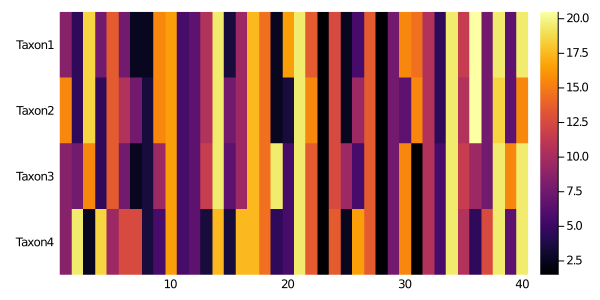

In [14]:
plot(msa)

In [15]:
println("\tsequences\tcolumns")
println( "Before:\t", nsequences(msa), "\t\t", ncolumns(msa)  )
# delete sequences with less than 90% coverage of the MSA length:
filtersequences!(msa, coverage(msa) .>= 0.9)
# delete columns with more than 10% of gaps:
filtercolumns!(msa, columngapfraction(msa) .<= 0.1)
println( "After:\t", nsequences(msa), "\t\t",  ncolumns(msa)  )

	sequences	columns
Before:	4		40
After:	4		40


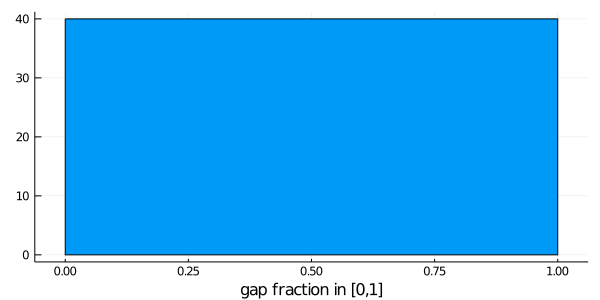

In [16]:
histogram(  vec(columngapfraction(msa)),
            # Using vec() to get a Vector{Float64} with the fraction of gaps of each column
            xlabel = "gap fraction in [0,1]", bins = 10, legend = false)

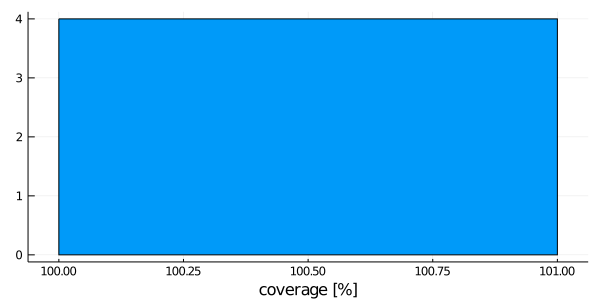

In [17]:
histogram(  vec(coverage(msa) .* 100.0), #  Column with the coverage of each sequence
            xlabel = "coverage [%]", legend=false)

In [18]:
pid = percentidentity(msa)

4×4 Named PairwiseListMatrix{Float64, false, Vector{Float64}}
Seq1 ╲ Seq2 │ Taxon1  Taxon2  Taxon3  Taxon4
────────────┼───────────────────────────────
Taxon1      │  100.0    65.0    65.0    50.0
Taxon2      │   65.0   100.0    47.5    40.0
Taxon3      │   65.0    47.5   100.0    52.5
Taxon4      │   50.0    40.0    52.5   100.0

In [19]:
pidtable = to_table(pid, diagonal=false)

6×3 Matrix{Any}:
 "Taxon1"  "Taxon2"  65.0
 "Taxon1"  "Taxon3"  65.0
 "Taxon1"  "Taxon4"  50.0
 "Taxon2"  "Taxon3"  47.5
 "Taxon2"  "Taxon4"  40.0
 "Taxon3"  "Taxon4"  52.5

In [20]:
quantile(convert(Vector{Float64}, pidtable[:,3]), [0.00, 0.25, 0.50, 0.75, 1.00])

5-element Vector{Float64}:
 40.0
 48.125
 51.25
 61.875
 65.0

In [21]:
meanpercentidentity(msa)

53.333333333333336

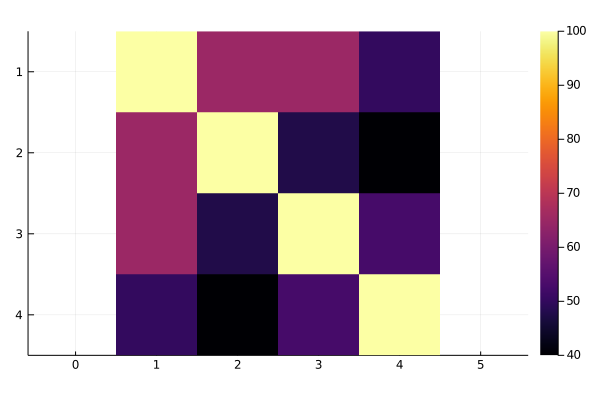

In [22]:
gr()
heatmap(convert(Matrix, pid), yflip=true, ratio=:equal)

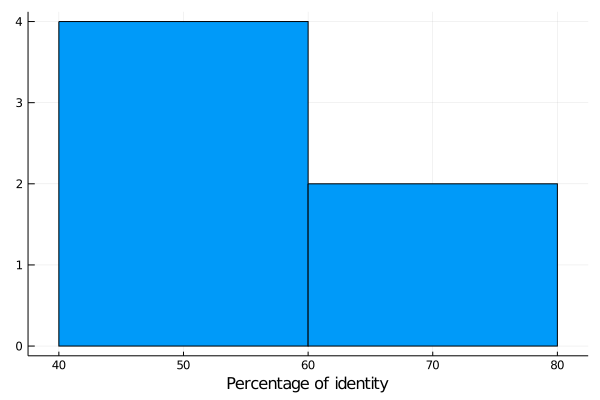

In [23]:
histogram(pidtable[:,3], xlabel ="Percentage of identity", legend=false)

In [24]:
getresidues(msa)

4×40 Matrix{Residue}:
 M  T  N  F  G  F  Y  Y  Q  C  S  P  L  R  W  K  D  E  Y  C  R  G  V  H  Y  S  G  V  F  Q  E  L  T  R  I  A  F  R  P  R
 Q  T  N  T  G  L  F  W  Q  C  S  P  L  R  F  K  D  E  Y  W  R  Q  V  H  Y  K  G  V  F  P  Q  L  T  R  L  A  F  N  P  Q
 M  F  Q  T  G  F  Y  W  K  C  S  P  I  R  P  K  D  E  R  S  R  G  V  H  K  S  G  V  F  Q  V  L  S  R  I  K  F  R  Q  R
 M  R  Y  N  K  H  H  W  S  C  S  P  W  D  W  D  D  E  T  S  R  G  V  G  Y  C  G  V  F  Q  V  L  S  R  L  T  H  R  P  R

In [25]:
getresiduesequences(msa)

4-element Vector{Vector{Residue}}:
 [M, T, N, F, G, F, Y, Y, Q, C  …  E, L, T, R, I, A, F, R, P, R]
 [Q, T, N, T, G, L, F, W, Q, C  …  Q, L, T, R, L, A, F, N, P, Q]
 [M, F, Q, T, G, F, Y, W, K, C  …  V, L, S, R, I, K, F, R, Q, R]
 [M, R, Y, N, K, H, H, W, S, C  …  V, L, S, R, L, T, H, R, P, R]

In [26]:
sequencenames(msa)

4-element Vector{String}:
 "Taxon1"
 "Taxon2"
 "Taxon3"
 "Taxon4"

## MIToS.MSA.gapstrip

Creates a new matrix of Residues (MSA) with deleted sequences and columns/positions. The MSA is edited in the following way:

Removes all the columns/position on the MSA with gaps on the reference (first) sequence
Removes all the sequences with a coverage with respect to the number of
columns/positions on the MSA less than a coveragelimit (default to 0.75: sequences with 25% of gaps)

Removes all the columns/position on the MSA with more than a gaplimit
(default to 0.5: 50% of gaps)

In [27]:
msa1 = MIToS.MSA.gapstrip(msa,gaplimit=0.65)

AnnotatedMultipleSequenceAlignment with 6 annotations : 4×40 Named Matrix{Residue}
Seq ╲ Col │  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
──────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Taxon1    │  M   T   N   F   G   F   Y   Y   Q   C   S   P   L   R   W   K   D   E   Y   C   R   G   V   H   Y   S   G   V   F   Q   E   L   T   R   I   A   F   R   P   R
Taxon2    │  Q   T   N   T   G   L   F   W   Q   C   S   P   L   R   F   K   D   E   Y   W   R   Q   V   H   Y   K   G   V   F   P   Q   L   T   R   L   A   F   N   P   Q
Taxon3    │  M   F   Q   T   G   F   Y   W   K   C   S   P   I   R   P   K   D   E   R   S   R   G   V   H   K   S   G   V   F   Q   V   L   S   R   I   K   F   R   Q   R
Taxon4    │  M   R   Y   N   K   H   H   W   S   C   S   P   W

In [28]:
residues = getresidues(msa1) # estimateincolumns functions take a Matrix{Residue}

4×40 Matrix{Residue}:
 M  T  N  F  G  F  Y  Y  Q  C  S  P  L  R  W  K  D  E  Y  C  R  G  V  H  Y  S  G  V  F  Q  E  L  T  R  I  A  F  R  P  R
 Q  T  N  T  G  L  F  W  Q  C  S  P  L  R  F  K  D  E  Y  W  R  Q  V  H  Y  K  G  V  F  P  Q  L  T  R  L  A  F  N  P  Q
 M  F  Q  T  G  F  Y  W  K  C  S  P  I  R  P  K  D  E  R  S  R  G  V  H  K  S  G  V  F  Q  V  L  S  R  I  K  F  R  Q  R
 M  R  Y  N  K  H  H  W  S  C  S  P  W  D  W  D  D  E  T  S  R  G  V  G  Y  C  G  V  F  Q  V  L  S  R  L  T  H  R  P  R

## Count residues to estimate the entropy. 
The entropy estimation is performed over a rehused Counts object. The result will be a vector containing the values estimated over each column without counting gaps (UngappedAlphabet).

In [29]:

Hx = mapcolfreq!(entropy, msa, Counts(ContingencyTable(Float64, Val{1}, UngappedAlphabet())))

1×40 Named Matrix{Float64}
Function ╲ Col │        1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40
───────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
entropy        │ 0.562335   1.03972   1.03972   1.03972  0.562335   1.03972   1.03972  0.562335   1.03972      -0.0      -0.0      -0.0   1.0

In [30]:
Hxy = mapcolpairfreq!(entropy, msa1, Counts(ContingencyTable(Float64, Val{2}, UngappedAlphabet())))

40×40 Named PairwiseListMatrix{Float64, true, Vector{Float64}}
Col1 ╲ Col2 │        1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40
────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
1           │ 0.562335   1.38629   1.38629   1.38629   1.03972   1.03972   1.03972   1.03972   1.38629  0.56233

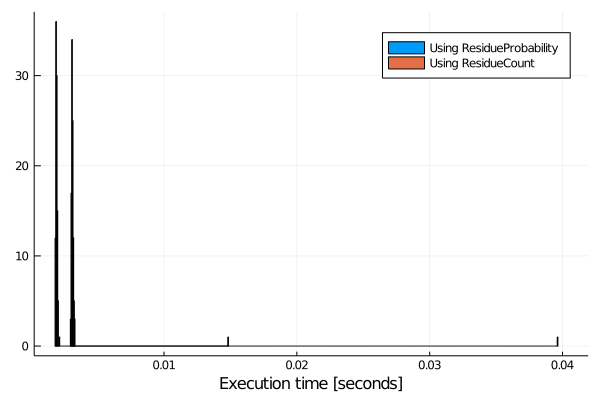

In [31]:
Time_Pab = map(1:100) do x
    time = @elapsed mapcolpairfreq!(entropy, msa, Probabilities(ContingencyTable(Float64, Val{2}, UngappedAlphabet())))
end

Time_Nab = map(1:100) do x
    time = @elapsed mapcolpairfreq!(entropy, msa, Counts(ContingencyTable(Float64, Val{2}, UngappedAlphabet())))
end

using Plots
gr()

histogram( [Time_Pab Time_Nab],
    labels = ["Using ResidueProbability" "Using ResidueCount"],
    xlabel = "Execution time [seconds]" )

In [32]:
NMIxy = mapcolpairfreq!(normalized_mutual_information, msa1, Counts(ContingencyTable(Float64, Val{2}, GappedAlphabet())), Val{false})

40×40 Named PairwiseListMatrix{Float64, false, Vector{Float64}}
Col1 ╲ Col2 │         1          2          3          4          5          6          7          8          9         10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40
────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
1           │       0.0   0.15

In [33]:
NMIxy_transpose = mapcolpairfreq!(normalized_mutual_information, transpose(msa1), Counts(ContingencyTable(Float64, Val{2}, GappedAlphabet())), Val{false})

4×4 Named PairwiseListMatrix{Float64, false, Vector{Float64}}
Col1 ╲ Col2 │   Taxon1    Taxon2    Taxon3    Taxon4
────────────┼───────────────────────────────────────
Taxon1      │      0.0  0.666555  0.702275  0.645725
Taxon2      │ 0.666555       0.0  0.585413  0.569895
Taxon3      │ 0.702275  0.585413       0.0  0.643936
Taxon4      │ 0.645725  0.569895  0.643936       0.0

In [34]:
NMI_matrix_t = convert(Matrix{Float64}, NMIxy_transpose.array)

4×4 Matrix{Float64}:
 0.0       0.666555  0.702275  0.645725
 0.666555  0.0       0.585413  0.569895
 0.702275  0.585413  0.0       0.643936
 0.645725  0.569895  0.643936  0.0

In [37]:
num_cluster = 1

1

In [38]:
# cluster X into 20 clusters using K-means 
KClusters = kmeans(NMI_matrix_t, num_cluster; maxiter = 100,  
                                display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.231494e+00
      1       1.231494e+00       0.000000e+00 |        0
K-means converged with 1 iterations (objv = 1.2314940808355233)


KmeansResult{Matrix{Float64}, Float64, Int64}([0.5036388785884249; 0.4554658185026451; 0.48290603675355837; 0.464889227054908;;], [1, 1, 1, 1], [0.3790352897129723, 0.2555247431784231, 0.32159865536259424, 0.2753353925815336], [4], [4], 1.2314940808355233, 1, true)

In [40]:
# verify the number of clusters 
nclusters(KClusters) == 1

true

In [41]:
# get the assignments of points to clusters 
cluster_assignment = assignments(KClusters) 

4-element Vector{Int64}:
 1
 1
 1
 1

In [42]:
# get the cluster sizes 
cnt = counts(KClusters) 

1-element Vector{Int64}:
 4

In [43]:
# get the cluster centers 
Cluster_Center = KClusters.centers 

4×1 Matrix{Float64}:
 0.5036388785884249
 0.4554658185026451
 0.48290603675355837
 0.464889227054908

In [44]:
df = DataFrame( seqnum = 1:nsequences(msa1),
                seqname = sequencenames(msa1),
                cluster = cluster_assignment, # the cluster number/index of each sequence
                coverage = vec(coverage(msa1)))

first(df, 20)

,seqnum,seqname,cluster,coverage
,Int64,String,Int64,Float64
1,1,Taxon1,1,1.0
2,2,Taxon2,1,1.0
3,3,Taxon3,1,1.0
4,4,Taxon4,1,1.0


In [45]:
# Group by clusters and calculate summary statistics
top_clusters = combine(
    groupby(df, :cluster),
    :seqnum => length => :n_sequences,
    :coverage => mean => :mean_coverage
)

# Display the top clusters
first(top_clusters, 20)  # Display the top 10 clusters


,cluster,n_sequences,mean_coverage
,Int64,Int64,Float64
1,1,4,1.0


In [46]:
# Assuming you already have the df DataFrame with the specified columns
df_filtered = filter(row -> row.cluster > 1, df)

first(df_filtered, 20)

,seqnum,seqname,cluster,coverage
,Int64,String,Int64,Float64


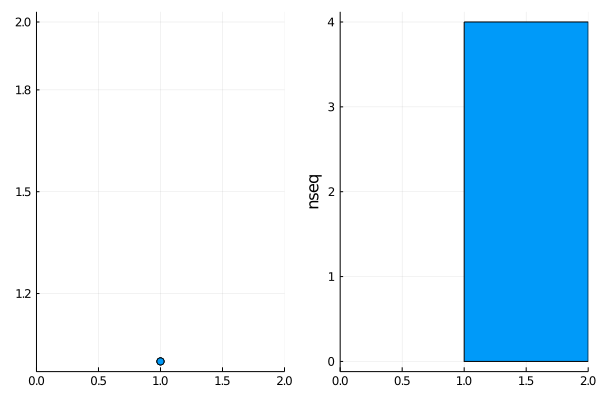

In [47]:
h = @df df histogram(:cluster, ylabel="nseq")
p = @df df plot(:cluster, :coverage, linetype=:scatter)
plot(p, h, nc=1, xlim=(0, nclusters(KClusters)+1 ), legend=false)

In [48]:
maxcoverage = by(df, :cluster, cl -> cl[ findmax(cl[:coverage])[2] ,
                 [:seqnum, :seqname, :coverage]])

first(maxcoverage, 20)

,cluster,seqnum,seqname,coverage
,Int64,Int64,String,Float64
1,1,1,Taxon1,1.0


### We use the Split-Apply-Combine strategy, though the by function of the DataFrames package, to select the sequence of highest coverage for each cluster.

In [49]:
p = @df maxcoverage plot(:cluster, :coverage, linetype=:scatter)
h = @df maxcoverage histogram(:cluster, ylabel="nseq")
plot(p, h, nc=1, xlim=(0, nclusters(KClusters)+1 ), legend=false)
png("msa_clusters_iii.png") # hide
nothing # hide

### We can easily generate a mask using list comprehension, to select only the representative sequences of the MSA (deleting the rest of the sequences with filtersequences!).

In [50]:
cluster_references = Bool[ seqnum in maxcoverage[:seqnum] for seqnum in 1:nsequences(msa1) ]

4-element Vector{Bool}:
 1
 0
 0
 0

In [51]:
filtersequences!(msa1, cluster_references)

AnnotatedMultipleSequenceAlignment with 4 annotations : 1×40 Named Matrix{Residue}
Seq ╲ Col │  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
──────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Taxon1    │  M   T   N   F   G   F   Y   Y   Q   C   S   P   L   R   W   K   D   E   Y   C   R   G   V   H   Y   S   G   V   F   Q   E   L   T   R   I   A   F   R   P   R

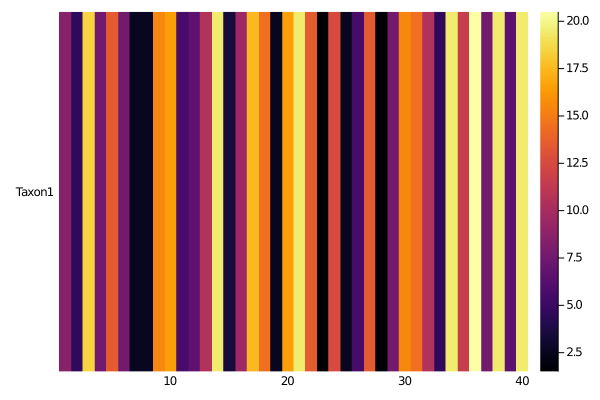

In [52]:
plot(msa1)

In [53]:
using Plots

sum(KClusters.assignments.==5)

0

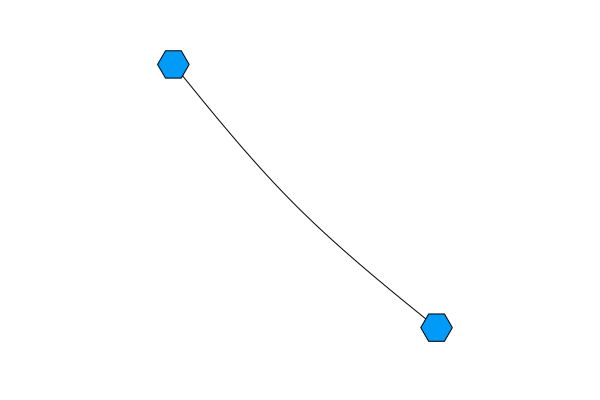

In [57]:
using GraphRecipes

graphplot(NMI_matrix_t[1:2,1:2])

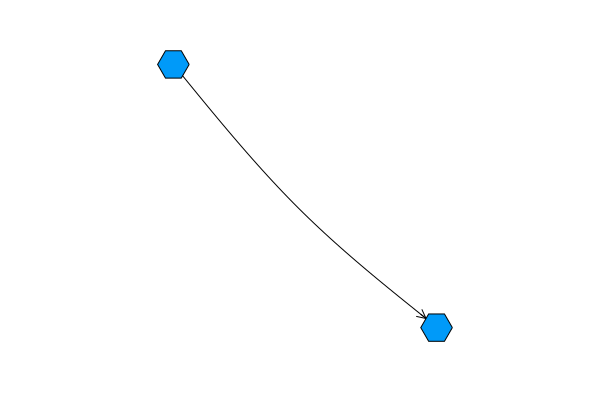

In [58]:
graphplot(UpperTriangular(NMI_matrix_t[1:2,1:2]))

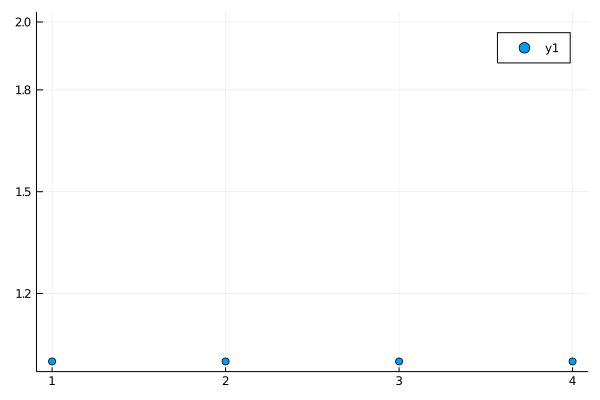

In [59]:
scatter(KClusters.assignments)

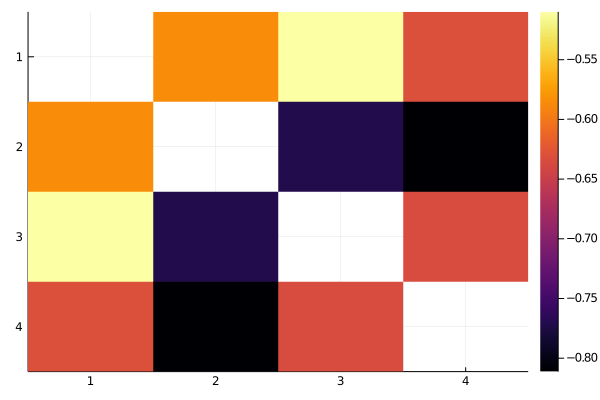

In [60]:
heatmap(log2.(NMI_matrix_t), yflip=true)

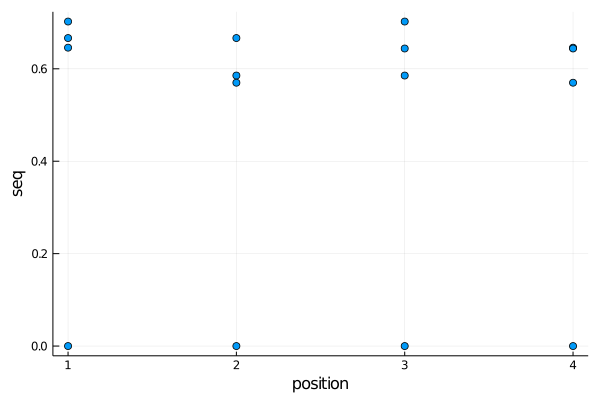

In [61]:
# Create a scatter plot
scatter(1:size(NMI_matrix_t, 2), NMI_matrix_t, color=cluster_assignment, legend=false)
xlabel!("position")
ylabel!("seq")



### Principal Component Analysis (PCA) Plot
Since the data has a high dimension, we can use PCA to reduce it to a few principal components and then plot the clusters.

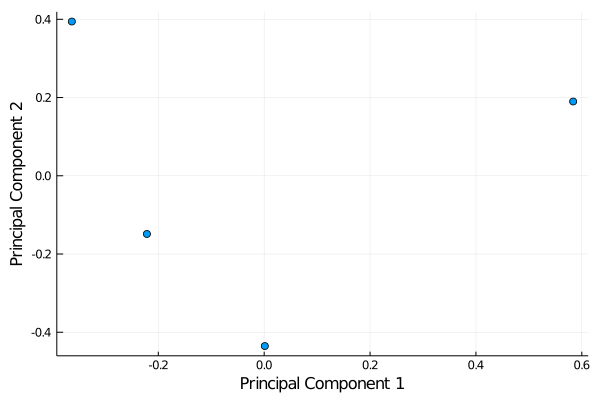

In [62]:
using MultivariateStats

# Perform PCA
pca_result = fit(PCA, NMI_matrix_t', maxoutdim=2)
pca_data = MultivariateStats.transform(pca_result, NMI_matrix_t')

# Create a PCA plot
scatter(pca_data[1, :], pca_data[2, :], color=cluster_assignment, legend=false)
xlabel!("Principal Component 1")
ylabel!("Principal Component 2")

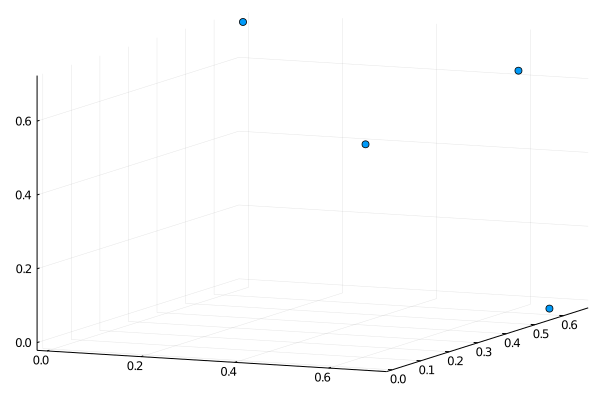

In [63]:
scatter3d(NMI_matrix_t[1, :], NMI_matrix_t[2, :], NMI_matrix_t[3, :], color=cluster_assignment, legend=false)
